In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [36]:
df = pd.read_csv("../dataset/output_ua_info.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


# data exploration 

In [37]:
print(
    f"The dataset contains {df.shape[0]} samples and "
    f"{df.shape[1] -1} columns"
)

The dataset contains 40000 samples and 33 columns


array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>,
        <Axes: title={'center': 'Packet Length'}>],
       [<Axes: title={'center': 'Anomaly Scores'}>,
        <Axes: title={'center': 'os_EndOfCare'}>,
        <Axes: title={'center': 'browser_EndOfCare'}>],
       [<Axes: title={'center': 'Source IP Prefix'}>,
        <Axes: title={'center': 'Destination IP Prefix'}>,
        <Axes: title={'center': 'Source Prefix Index'}>],
       [<Axes: title={'center': 'Dest Prefix Index'}>, <Axes: >,
        <Axes: >]], dtype=object)

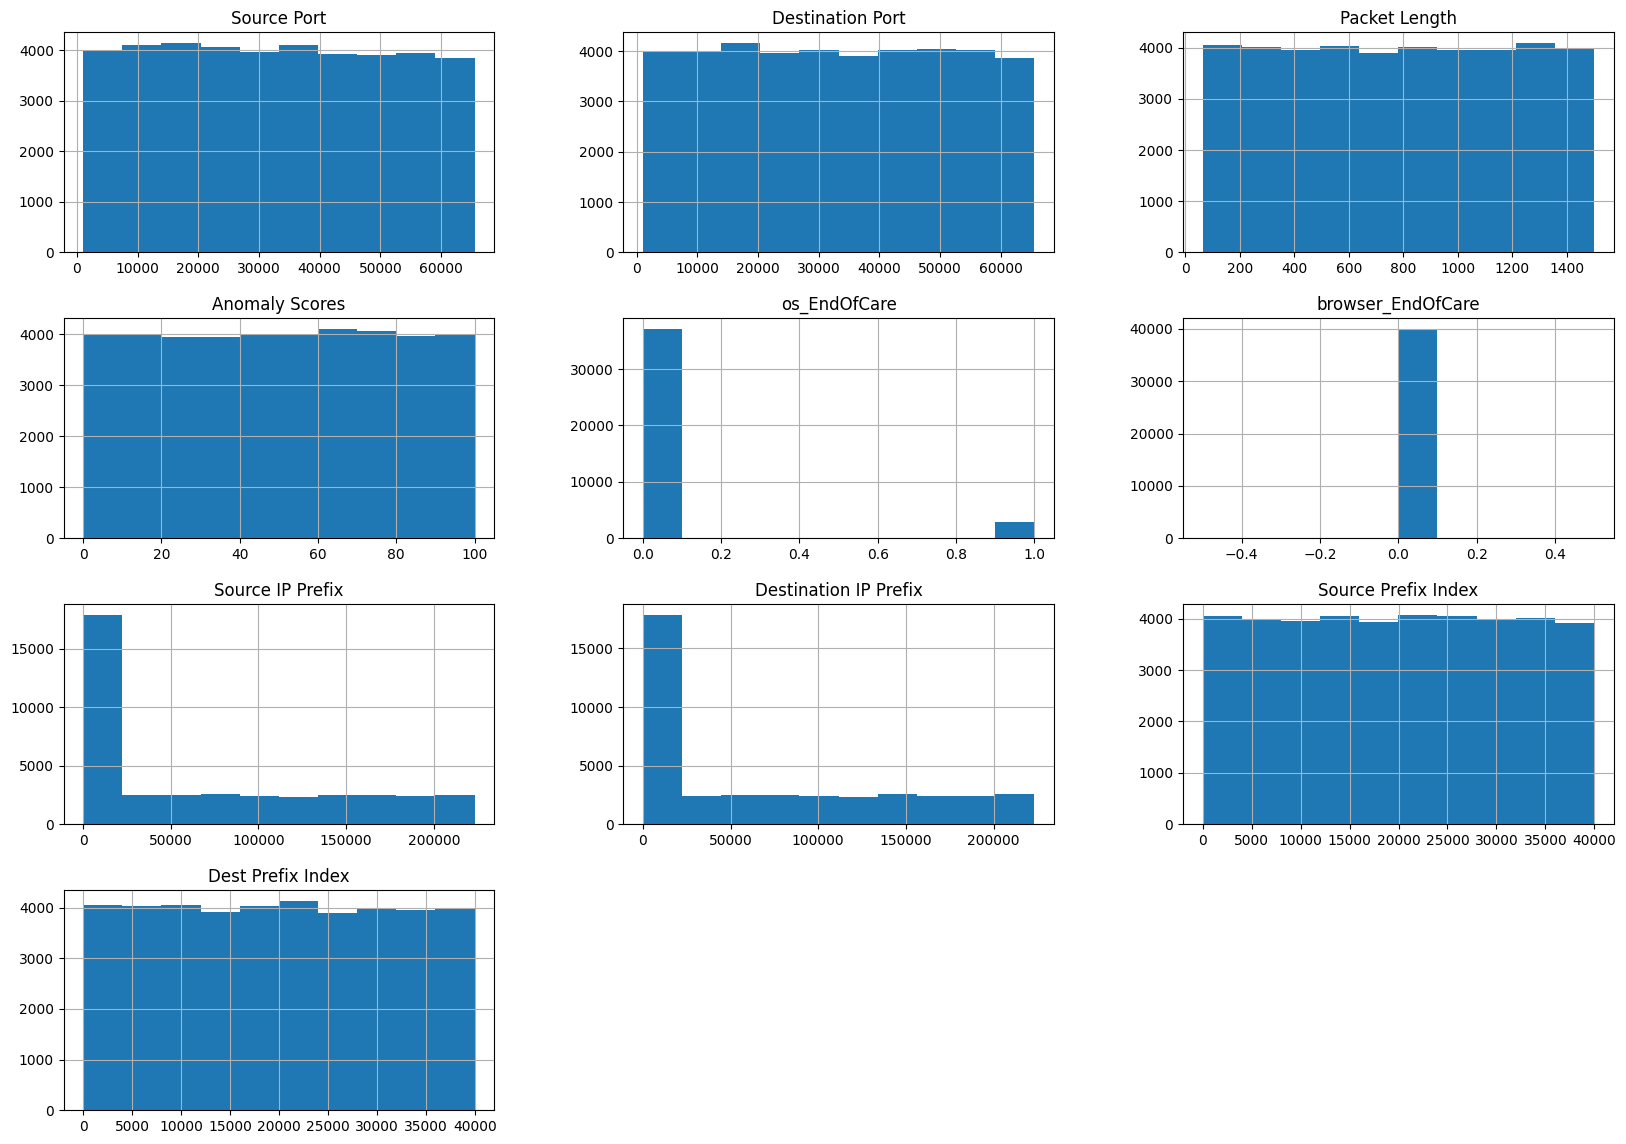

In [10]:
df.hist(figsize=(20, 14))

In [25]:
# import pandas as pd
# from user_agents import parse

 
# df['os'] = df['Device Information'].apply(lambda x: parse(x).os.family)
# df['os_version'] = df['Device Information'].apply(lambda x: parse(x).os.version_string)
# df['browser'] = df['Device Information'].apply(lambda x: parse(x).browser.family)
# df['browser_version'] = df['Device Information'].apply(lambda x: parse(x).browser.version_string)
# df['device'] = df['Device Information'].apply(lambda x:   parse(x).device.brand)
# df['device_model'] = df['Device Information'].apply(lambda x: parse(x).device.model)
# print(df[['Device Information','os','os_version','browser','browser_version','device','device_model']].head(20))
# df.to_csv(r'Project 1\cybersecurity_attacks_new.csv')

In [11]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'version_os', 'browser_os', 'device_type', 'os_EndOfCare',
       'browser_EndOfCare', 'Source IP Prefix', 'Destination IP Prefix',
       'Source Prefix Index', 'Dest Prefix Index'],
      dtype='object')

## target classes

In [12]:
target = 'Attack Type'
print(df[target].value_counts())


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


## unique value

In [42]:
# print(f"version_os unique value {df['version_os'].unique()}")

print(f"device_type unique value {df['device_type'].unique()} \n")
print(f"os_EndOfCare unique value {df['os_EndOfCare'].unique()} \n")
print(f"Severity Level unique value {df['Severity Level'].unique()} \n")
print(f"traffic type unique value {df['Traffic Type'].unique()} \n")
print(f"Protocol unique value {df['Protocol'].unique()} \n")
print(f"Attack signature unique value {df['Attack Signature'].unique()} \n")
print(f"Network Segment unique value {df['Network Segment'].unique()} n")

device_type unique value ['computer' 'mobile' 'tablet'] 

os_EndOfCare unique value [0 1] 

Severity Level unique value ['Low' 'Medium' 'High'] 

traffic type unique value ['HTTP' 'DNS' 'FTP'] 

Protocol unique value ['ICMP' 'UDP' 'TCP'] 

Attack signature unique value ['Known Pattern B' 'Known Pattern A'] 

Network Segment unique value ['Segment A' 'Segment B' 'Segment C'] n


In [56]:

print(f"{df['Traffic Type'].value_counts()} \n")
print(f"{df['Protocol'].value_counts()} \n")
print(f" {df['Attack Signature'].value_counts()} \n")
print(f" {df['Network Segment'].value_counts()} \n")




Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64 

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64 

 Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64 

 Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64 



In [57]:
print(f"{df['IDS/IPS Alerts'].value_counts()} \n")
print(f"{df['Alerts/Warnings'].value_counts()} \n")
print(f"{df['Malware Indicators'].value_counts()} \n")
print(f"{df['Firewall Logs'].value_counts()} \n")

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64 

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64 

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64 

Firewall Logs
Log Data    20039
Name: count, dtype: int64 



# data cleaning

In [40]:
# Count missing (NaN) values per column
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts

Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64

In [59]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].notna().astype(int)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].notna().astype(int)
df['Malware Indicators'] = df['Malware Indicators'].notna().astype(int)
df['Firewall Logs'] = df['Firewall Logs'].notna().astype(int)
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts

Proxy Information    19851
dtype: int64

In [60]:
#Select relevant features and target
# features = ['Protocol', 'Traffic Type' ,
#             'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
#             'Severity Level', 'IDS/IPS Alerts','Action Taken','Attack Signature','Source Port','Destination Port']

# to_drop_cols = ['Timestamp','Payload Data','User Information','Device Information', 'Source Port',
#              'Geo-location Data','Proxy Information','Source IP Address','Destination IP Address',
#              'Packet Lenght']
# df_cleaned= df.drop(to_drop_cols, axis=1)
# df_cleaned = df[[target,'Protocol', 'Traffic Type' ,'os','browser','Packet Type',
#                  'Alerts/Warnings','Action Taken','Severity Level','Log Source',
#                  'Anomaly Scores','Firewall Logs','IDS/IPS Alerts','Malware Indicators',
#                  'Network Segment','device_model']]



df_cleaned = df[[target, 'Protocol','Traffic Type' , 'Packet Type',
                 'Action Taken','Severity Level',
                 'Anomaly Scores','Firewall Logs','IDS/IPS Alerts','Malware Indicators',
                 'Attack Signature','device_type', 'os_EndOfCare']]


x = df_cleaned.drop(target,axis=1)
y = df_cleaned[target]
print(x)

      Protocol Traffic Type Packet Type Action Taken Severity Level  \
0         ICMP         HTTP        Data       Logged            Low   
1         ICMP         HTTP        Data      Blocked            Low   
2          UDP         HTTP     Control      Ignored            Low   
3          UDP         HTTP        Data      Blocked         Medium   
4          TCP          DNS        Data      Blocked            Low   
...        ...          ...         ...          ...            ...   
39995      UDP         HTTP     Control       Logged         Medium   
39996      UDP         HTTP     Control       Logged           High   
39997      UDP          DNS        Data      Blocked            Low   
39998      UDP          FTP        Data      Ignored            Low   
39999     ICMP         HTTP     Control       Logged         Medium   

       Anomaly Scores  Firewall Logs  IDS/IPS Alerts  Malware Indicators  \
0               28.67              1               1                   

In [61]:
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['int', 'float']).columns
print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)

Categorical Features: Index(['Protocol', 'Traffic Type', 'Packet Type', 'Action Taken',
       'Severity Level', 'Attack Signature', 'device_type'],
      dtype='object')
Numerical Features: Index(['Anomaly Scores', 'Firewall Logs', 'IDS/IPS Alerts',
       'Malware Indicators', 'os_EndOfCare'],
      dtype='object')


# Plot each class with variable 

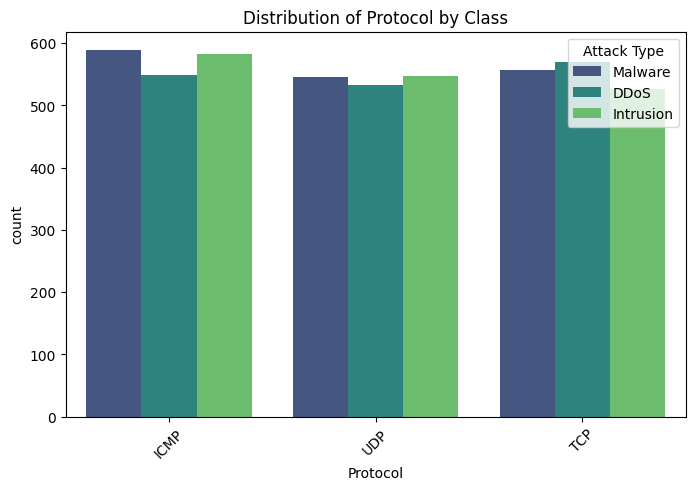

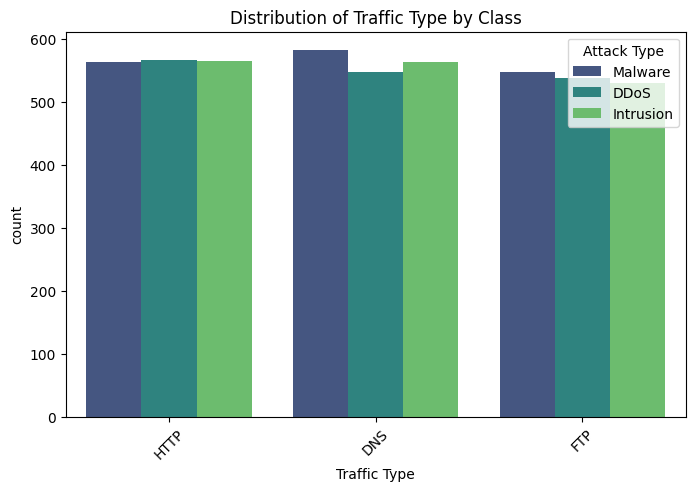

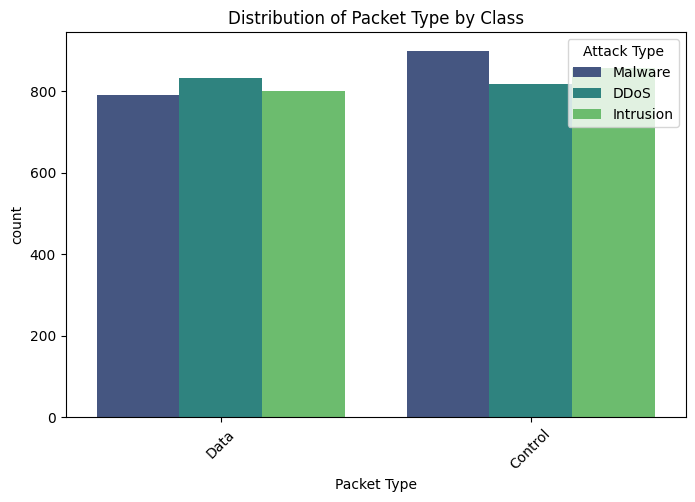

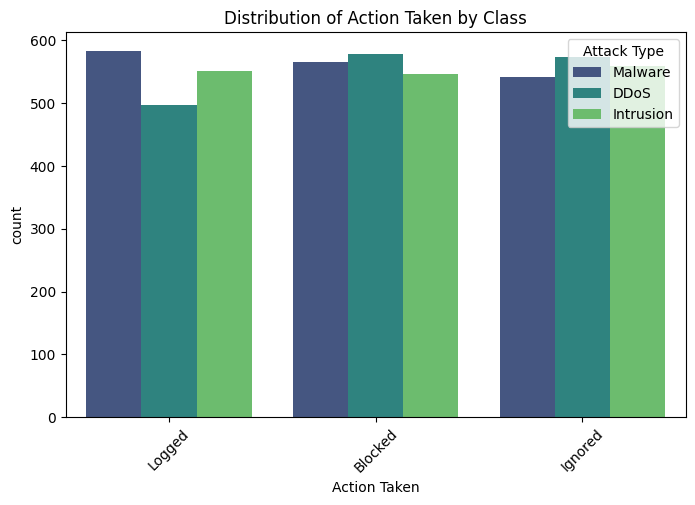

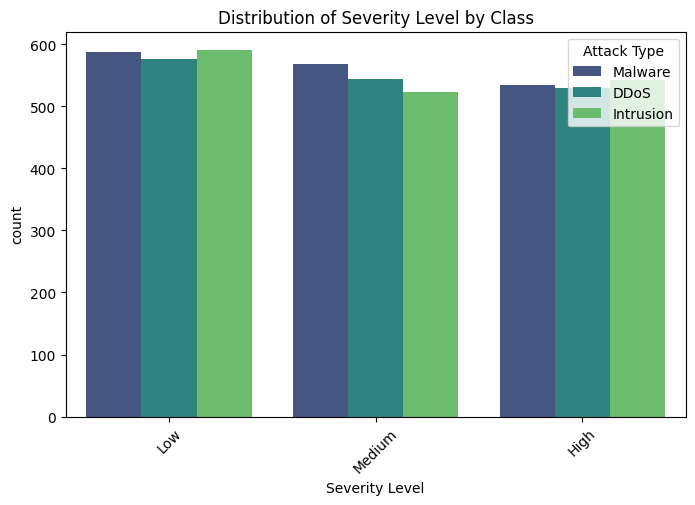

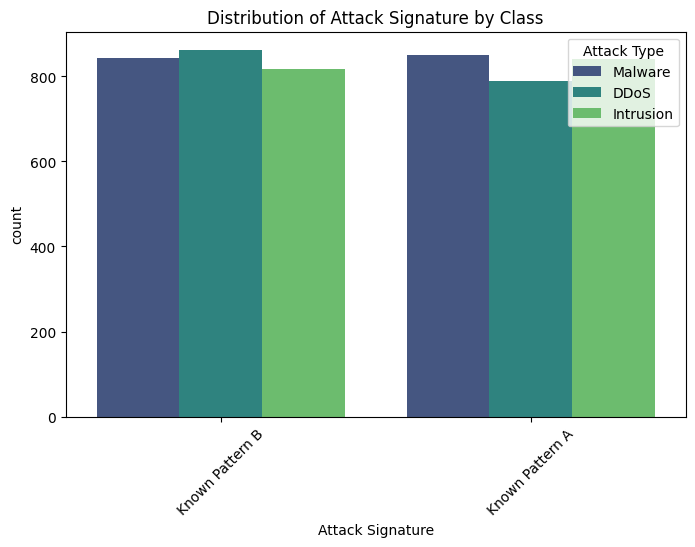

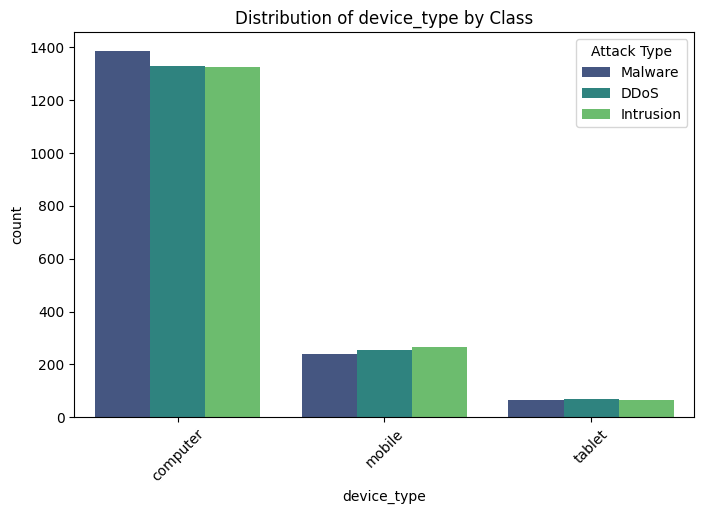

In [62]:
for feature in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned[:5000], x=feature, hue=target, palette="viridis")
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()

# pipleline

In [65]:
from sklearn.tree import DecisionTreeClassifier
def build_pipeline(x):
    categorical_cols = x.select_dtypes(include=['object']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'  # Keep numerical columns as they are
    )
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))
        # ('classifier', DecisionTreeClassifier(random_state=42))
    ])
    
    return pipeline

def train_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
    
    pipeline = build_pipeline(x)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    # acc = accuracy_score(y_test, y_pred)
    # print(f'Accuracy: {acc:.4f}')
    # print(classification_report(y_test, y_pred))


    y_pred_train = pipeline.predict(x_train)
    print("Accuracy Score on training set:", accuracy_score(y_train, y_pred_train))
    print("Accuracy Score on testing set:", accuracy_score(y_test, y_pred))
    
    return pipeline

In [66]:
pipline1 = train_model(x,y)

Accuracy Score on training set: 0.9403125
Accuracy Score on testing set: 0.330875


## ex1

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
# Temporary preprocessing for RFE
X_train_processed = preprocessor.fit_transform(x_train)
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=10)
selector.fit(X_train_processed, y_train)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=10)

In [58]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]

print("Selected features:", selected_feature_names)

Selected features: ['num__Anomaly Scores' 'num__Firewall Logs' 'num__IDS/IPS Alerts'
 'num__Malware Indicators' 'cat__Protocol_ICMP' 'cat__Traffic Type_FTP'
 'cat__Traffic Type_HTTP' 'cat__Action Taken_Logged'
 'cat__Severity Level_High' 'cat__Network Segment_Segment C']


In [51]:
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
selector.fit(X_train_processed, y_train)

# Get selected feature indices
selected_indices = selector.support_

# Retrieve feature names after preprocessing
preprocessor_feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Ensure the length of selected_indices matches the length of preprocessor_feature_names
assert len(selected_indices) == len(preprocessor_feature_names), "Mismatch in feature lengths"

# Get the selected feature names
selected_features = [preprocessor_feature_names[i] for i in range(len(preprocessor_feature_names)) if selected_indices[i]]
print("Selected Features by RFE:", selected_features)

ValueError: operands could not be broadcast together with shapes (5,) (41,) 

In [50]:

selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
selector.fit(X_train_processed, y_train)
# Get selected feature indices
selected_indices = selector.support_

# Map back to original feature names
# First, retrieve feature names after preprocessing
preprocessor_feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Get the selected feature names
selected_features = [preprocessor_feature_names[i] for i in range(len(preprocessor_feature_names)) if selected_indices[i]]
print("Selected Features by RFE:", selected_features)

ValueError: operands could not be broadcast together with shapes (5,) (41,) 

In [30]:
def filter_features(X):
    return X[:, selector.support_]

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', FunctionTransformer(filter_features)),  # Keep RFE-selected features
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

In [31]:


model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)
print("Accuracy Score on training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score on testing set:", accuracy_score(y_test, y_pred))

Accuracy Score on training set: 0.34709375
Accuracy Score on testing set: 0.344125
